# Working with graphs (Part 1)
Visualization

In this exercise we will obtain a sample set of trees related with the Bats (Order) node. We will convert it to a Network object for visualizing and exploring graph properties.


In [13]:
## Import modules and libraries
%matplotlib inline
import sys
sys.path.append('/apps')
import django
django.setup()
import numpy as np
import matplotlib.pyplot as plt
# visualizing and analysing
from networkx.drawing.nx_agraph import graphviz_layout
import networkx as nt

## Biospytial modules

In [14]:
## Import modules
from drivers.tree_builder import TreeNeo
from drivers.graph_models import TreeNode, Order, Family, graph, pickNode
from traversals.strategies import sumTrees, UniformRandomSampleForest


## Pick the node "Bats" (Chiroptera)

In [15]:
bats = pickNode(Order,'Chiropt')

In [16]:
%time cells = list(bats.cells)

CPU times: user 11.6 s, sys: 80 ms, total: 11.7 s
Wall time: 11.8 s


In [17]:
trees = UniformRandomSampleForest(cells,10)

In [19]:
## trees is a generator -> cast to list
%time trees = list(trees)

CPU times: user 20.5 s, sys: 900 ms, total: 21.4 s
Wall time: 24 s


### It is possible to get faster data (not a random sample)

In [20]:
%time trees_fast = bats.getAssociatedTrees(first_n_cells=10)

INFO Retrieving cells
INFO:biospytial.graph_models:Retrieving cells
INFO Done!
INFO:biospytial.graph_models:Done!
INFO Retriving Occurrences
INFO:biospytial.graph_models:Retriving Occurrences


CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 7.12 ms


## Obtain a folded Tree (Sum, integral, etc..)
Here the importance of Monoid structure

In [21]:
bt = reduce(lambda a,b : a+b , trees)

INFO Merging Trees
INFO Merging Trees
INFO Merging Trees
INFO Merging Trees
INFO Merging Trees
INFO Merging Trees
INFO Merging Trees
INFO Merging Trees


## Frequencies analysis for each node using a given list of trees.

In [24]:
bt.countNodesFrequenciesOnList(trees)

INFO Going deep 1
INFO Going deep 1
INFO Going deep 1
INFO Going deep 1
INFO Going deep 1
INFO Going deep 1
INFO Going deep 2
INFO Going deep 2
INFO Going deep 1
INFO Going deep 1
INFO Going deep 1
INFO Going deep 1
INFO Going deep 1
INFO Going deep 1
INFO Going deep 1
INFO Going deep 1
INFO Going deep 1
INFO Going deep 1
INFO Going deep 1
INFO Going deep 1
INFO Going deep 1
INFO Going deep 1
INFO Going deep 1
INFO Going deep 1
INFO Going deep 2
INFO Going deep 3
INFO Going deep 3
INFO Going deep 1
INFO Going deep 1
INFO Going deep 1
INFO Going deep 1
INFO Going deep 1
INFO Going deep 1
INFO Going deep 1
INFO Going deep 1
INFO Going deep 1
INFO Going deep 1
INFO Going deep 2
INFO Going deep 1
INFO Going deep 1
INFO Going deep 1
INFO Going deep 1
INFO Going deep 1
INFO Going deep 2
INFO Going deep 1
INFO Going deep 1
INFO Going deep 1
INFO Going deep 1
INFO Going deep 2
INFO Going deep 1
INFO Going deep 1
INFO Going deep 2
INFO Going deep 1
INFO Going deep 1
INFO Going deep 1
INFO Going

0.05

## Convert the TreeNeo object to a Network instance (networkx)
### The depth_level restricts the depth of the recursion process.

In [35]:
gt = bt.toNetworkx(depth_level=4)

## Visualizing the graph (now gt)

In [36]:
extractNames = lambda graph : {k:v for (k,v) in map(lambda n : (n,n.node.name),graph.nodes())}
extractColors = lambda graph :  map(lambda n : n.level,graph.nodes())
extractfreqs = lambda graph :  np.array(map(lambda n : n.n_presences_in_list,graph.nodes()))

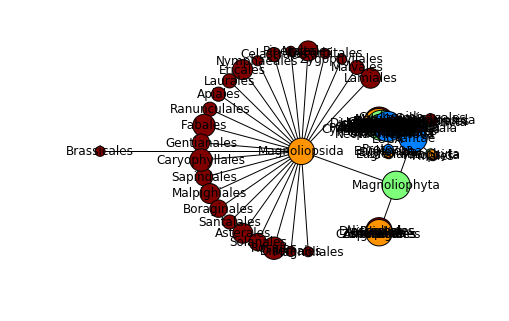

In [37]:
root = bt.node
pos = graphviz_layout(gt,prog='circo',root=root.node.name)
g_labels = bt.toNetworkx(depth_level=4)
nt.draw(gt,pos,labels=extractNames(g_labels),node_color=extractColors(gt),node_size=extractfreqs(gt)*100)
plt.show()

## Import an apropriate layout (graphviz)

In [2]:
from networkx.drawing.nx_agraph import graphviz_layout
import networkx as nt

## Pick a node from the Tree of Life

In [3]:
bats = pickNode(Order,'Chiropt')

## Get some (not all) cells and obtain the subtree

In [4]:
trees = bats.getAssociatedTrees(first_n_cells=10)

INFO Retrieving cells
INFO:biospytial.graph_models:Retrieving cells
INFO Done!
INFO:biospytial.graph_models:Done!
INFO Retriving Occurrences
INFO:biospytial.graph_models:Retriving Occurrences


In [5]:
trees = list(trees)

## Obtain a folded tree

In [6]:
bt = reduce(lambda a,b :a+b ,trees)

INFO Merging Trees
INFO Merging Trees
INFO Merging Trees
INFO Merging Trees
INFO Merging Trees
INFO Merging Trees
INFO Merging Trees
INFO Merging Trees
INFO Merging Trees


## Convert to a "Graph" instance to analyse

In [7]:
graph_trees = map(lambda t : t.toNetworkx(depth_level=6),trees)

## Convert the "big tree" to a Network instance

In [8]:
extractNames = lambda graph : {k:v for (k,v) in map(lambda n : (n,n.name),graph.nodes())}

In [9]:
gt = bt.toNetworkx(depth_level=7)

In [10]:
pos =  graphviz_layout(gt,prog='circo',root='LUCA')

KeyError: <LocalTree | Genus: Oreothlypis - n.count : 2- | AF: 0.05 >

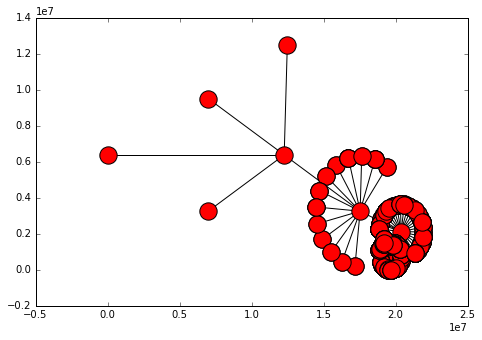

In [11]:
nt.draw(gt,pos,labels=extractNames(graph_trees[2]))

In [12]:
## Convert to JSON and put it in the redis machine
from drivers.encoders import TreeNodeEncoder
from networkx.readwrite import json_graph
xx = json.dumps(json_graph.node_link_data(gt),cls=TreeNodeEncoder)

NameError: name 'json' is not defined

INFO Retrieving cells
INFO:biospytial.graph_models:Retrieving cells
INFO Done!
INFO:biospytial.graph_models:Done!
INFO Retriving Occurrences
INFO:biospytial.graph_models:Retriving Occurrences
INFO Merging Trees
INFO Merging Trees
INFO Merging Trees
INFO Merging Trees
INFO Merging Trees
INFO Merging Trees
INFO Merging Trees
INFO Merging Trees
INFO Merging Trees
INFO Going deep 1
INFO Going deep 1
INFO Going deep 1
INFO Going deep 2
INFO Going deep 2
INFO Going deep 2
INFO Going deep 2
INFO Going deep 2
INFO Going deep 2
INFO Going deep 3
INFO Going deep 1
INFO Going deep 1
INFO Going deep 1
INFO Going deep 3
INFO Going deep 1
INFO Going deep 1
INFO Going deep 1
INFO Going deep 1
INFO Going deep 1
INFO Going deep 1
INFO Going deep 1
INFO Going deep 1
INFO Going deep 1
INFO Going deep 1
INFO Going deep 2
INFO Going deep 2
INFO Going deep 2
INFO Going deep 1
INFO Going deep 4
INFO Going deep 1
INFO Going deep 5
INFO Going deep 1
INFO Going deep 1
INFO Going deep 5
INFO Going deep 1
INFO Go

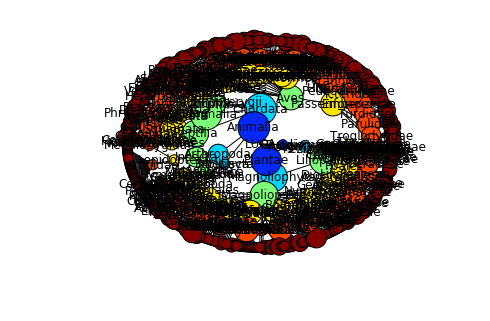

In [12]:
## just for testing
from networkx.drawing.nx_agraph import graphviz_layout
import networkx as nt
from drivers.tree_builder import TreeNeo
from drivers.graph_models import TreeNode, Order, Family, graph, pickNode
from traversals.strategies import sumTrees, UniformRandomSampleForest
import numpy as np
import matplotlib.pyplot as plt
bats = pickNode(Order,'Chiropt')
trees = bats.getAssociatedTrees(first_n_cells=10)
trees = list(trees)
bt = reduce(lambda a,b : a+b , trees)
gt = bt.toNetworkx(depth_level=6)
bt.countNodesFrequenciesOnList(trees)
extractNames = lambda graph : {k:v for (k,v) in map(lambda n : (n,n.node.name),graph.nodes())}
extractColors = lambda graph :  map(lambda n : n.level,graph.nodes())
extractfreqs = lambda graph :  np.array(map(lambda n : n.n_presences_in_list,graph.nodes()))
root = bt.node
pos = graphviz_layout(gt,prog='twopi',root=root.node.name)
g_labels = bt.toNetworkx(depth_level=5)
nt.draw(gt,pos,labels=extractNames(g_labels),node_color=extractColors(gt),node_size=extractfreqs(gt)*100)
plt.show()


